# <center>Лабораторна робота №3. <br> Візуальний аналіз даних про публікації на сайті Хабрахабр</center>

**Заповніть код в клітинках**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Завантаження і знайомство з даними

Для роботи вам знадобляться поепердньо оброблені дані з платформи kaggle (https://www.kaggle.com/c/howpop-habrahabr-favs).

Доступ до даних на google drive, якщо ви відкриваєте блокнот в google colab, а не на PC, можна отримати шляхом монтування google drive

In [2]:
# шлях до папки з даними
data_folder = 'data/'

In [3]:
df = pd.read_csv(data_folder+'/howpop_train.csv')

In [4]:
df.shape

(134137, 17)

In [5]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Позбавимося відразу від змінних, назви яких закінчуються на `_lognorm` (потрібні для змагань на Kaggle). Виберемо їх за допомогою `filter()` і видаимо `drop`-ом:

In [6]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столвбці 
        inplace = True) # позбавляє від необхідності зберігати датасет

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [8]:
df.describe(include = ['object', 'bool'] # бінарні і категоріальні змінні
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/314088/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [9]:
# налаштування зовнішнього вигляду графіків в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Стовбець **`published`** (час публікації) містить рядки. Щоб ми мали змогу працювати з цими даними як з датою/часом публікації, приведемо їх до типу `datetime`:

In [10]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Створимо декілька стовбців на основі даних про час публікації:

In [11]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Відтепер Ваша черга. В кожному пункті пропонується побудувати картинку і з її допомогою відповісти на питання. Звичано, можна спробувати відповісти на всі питання лише використовуючи Pandas, без картинок, але ми радимо Вам потренуватися будувати (красиві) візуалізації.   

## 1\. В якому місяці (і якого року) було більше всього публікацій?

* березень 2016
* березень 2015
* квітень 2015
* квітень 2016

Найбільше публікацій було у 3 місяці 2015 року: 2189 публікацій.


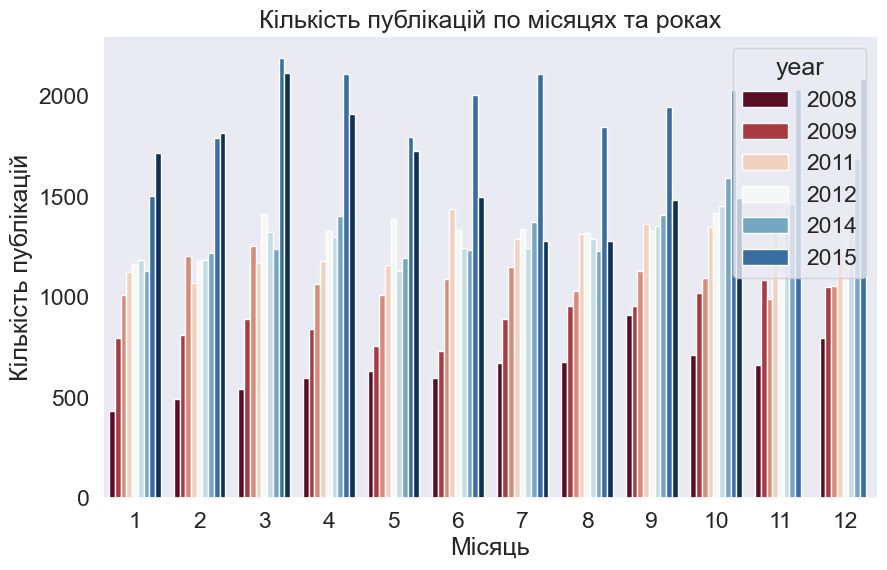

In [12]:
# Підрахунок кількості публікацій по роках і місяцях
publication_count = df.groupby(['year', 'month']).size().reset_index(name='count')

# Пошук місяця і року з найбільшою кількістю публікацій
max_publication_month = publication_count.loc[publication_count['count'].idxmax()]

print(f"Найбільше публікацій було у {max_publication_month['month']} місяці {max_publication_month['year']} року: {max_publication_month['count']} публікацій.")

# Візуалізація кількості публікацій по місяцях і роках
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', hue='year', data=publication_count, palette='RdBu')
plt.title('Кількість публікацій по місяцях та роках')
plt.xlabel('Місяць')
plt.ylabel('Кількість публікацій')
plt.show()

Відповідь у березні 2015 року

## 2\. Проаналізуйте публікації в месяці з попереднього питання

Виберіть один чи декілька варіантів:

* Один чи декілька днів сильно виділяються із загальної картини
* На хабрі _завжди_ більше статей, ніж на гіктаймсі
* По суботам на гіктаймс і на хабрахабр публікують приблизно одинакову кількість статей

Підказки: побудуйте графік залежності числа публікацій від дня; використовуйте параметр `hue`; не переймайтесь сильно з відповідями і не шукайте прихованого змісту :)

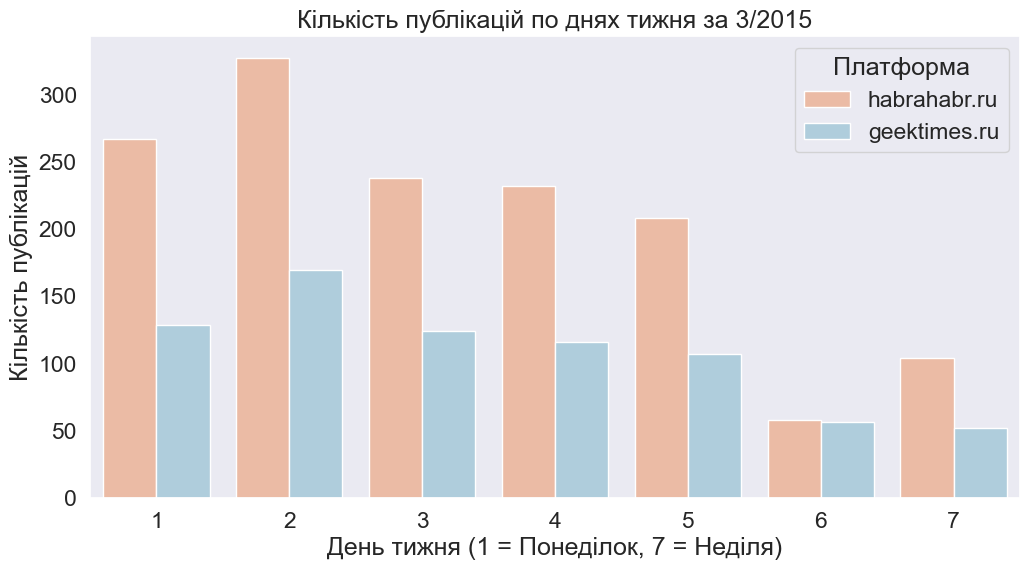

In [13]:
# Використовуємо місяць і рік з найбільшою кількістю публікацій
top_year = max_publication_month['year']
top_month = max_publication_month['month']

# Фільтрація даних для обраного місяця і року
df_top_month = df[(df['year'] == top_year) & (df['month'] == top_month)]

# Фільтруємо лише записи з платформ 'habrahabr.ru' і 'geektimes.ru' або інших доменів
df_platform_filtered = df_top_month[df_top_month['domain'].isin(['habrahabr.ru', 'geektimes.ru'])]

# Побудова графіка залежності числа публікацій від дня тижня, з порівнянням платформ
plt.figure(figsize=(12, 6))
sns.countplot(x='dayofweek', hue='domain', data=df_platform_filtered, palette='RdBu')
plt.title(f'Кількість публікацій по днях тижня за {top_month}/{top_year}')
plt.xlabel('День тижня (1 = Понеділок, 7 = Неділя)')
plt.ylabel('Кількість публікацій')
plt.legend(title='Платформа', loc='upper right')
plt.show()

Відповіді:
* Один чи декілька днів сильно виділяються із загальної картини?
- у вівторок завжди більше публікацій на обох платформах
* На хабрі _завжди_ більше статей, ніж на гіктаймсі?
- так на Хабрі завжди більше статей.
* По суботам на гіктаймс і на хабрахабр публікують приблизно одинакову кількість статей?
- так по суботам на обох ресурсах друкують приблизно однакову кількість статей (стовпчики під №6) 

## 3\. Коли найкраще всього опублікувати статтю?

* Більш всього переглядів набирають статті, опубліковані в 12 годин дня
* В опублікованих о 10-й ранку постів більше всього коментарів
* Більше всього переглядів набирають статтті, опубліковані в 6 годин ранку
* Максимальне число коментарів на гіктаймсі набрала стаття, опублікована в 9 годин вечора
* На хабрі денні статті комментують частіше, ніж вечірні

<Figure size 1000x600 with 0 Axes>

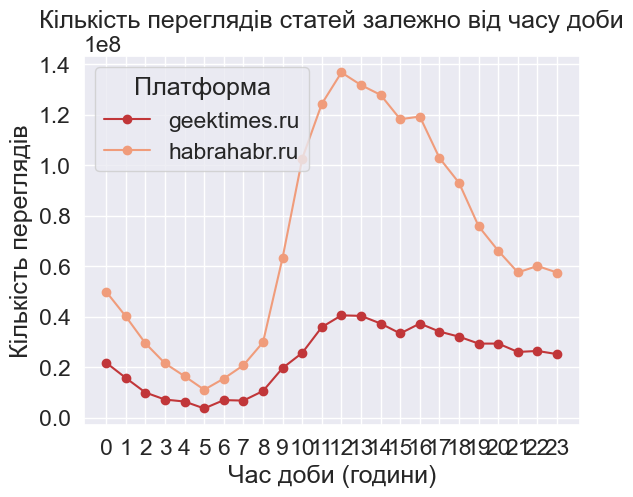

<Figure size 1000x600 with 0 Axes>

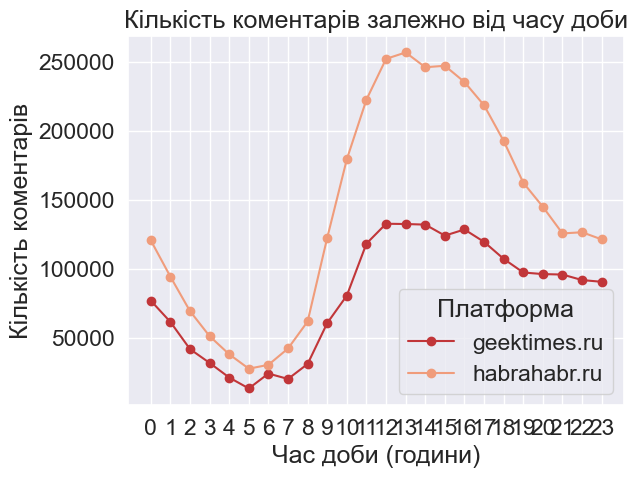

In [17]:
# Фільтрація за платформами 'habrahabr.ru' та 'geektimes.ru'
df_filtered = df[df['domain'].isin(['habrahabr.ru', 'geektimes.ru'])]

# Фільтрація за годинами з 0 до 23
df_filtered = df_filtered[(df_filtered['hour'] >= 0) & (df_filtered['hour'] <= 23)]

# Групування за годинами і платформами
grouped_views = df_filtered.groupby(['hour', 'domain'])['views'].sum().unstack()
grouped_comments = df_filtered.groupby(['hour', 'domain'])['comments'].sum().unstack()

# Побудова графіка для кількості переглядів
plt.figure(figsize=(10, 6))
grouped_views.plot(kind='line', marker='o')
plt.title('Кількість переглядів статей залежно від часу доби')
plt.xlabel('Час доби (години)')
plt.ylabel('Кількість переглядів')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Платформа')
plt.show()

# Побудова графіка для кількості коментарів
plt.figure(figsize=(10, 6))
grouped_comments.plot(kind='line', marker='o')
plt.title('Кількість коментарів залежно від часу доби')
plt.xlabel('Час доби (години)')
plt.ylabel('Кількість коментарів')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Платформа')
plt.show()

Відповіді

* Більш всього переглядів набирають статті, опубліковані в 12 годин дня
* В опублікованих о 10-й ранку постів більше всього коментарів
 - ні
* Більше всього переглядів набирають статтті, опубліковані в 6 годин ранку
 - ні 
* Максимальне число коментарів на гіктаймсі набрала стаття, опублікована в 9 годин вечора
 - ні, в 12:00
* На хабрі денні статті комментують частіше, ніж вечірні
 - так

## 4\. Кого з топ-20 авторів частіше всього мінусують?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

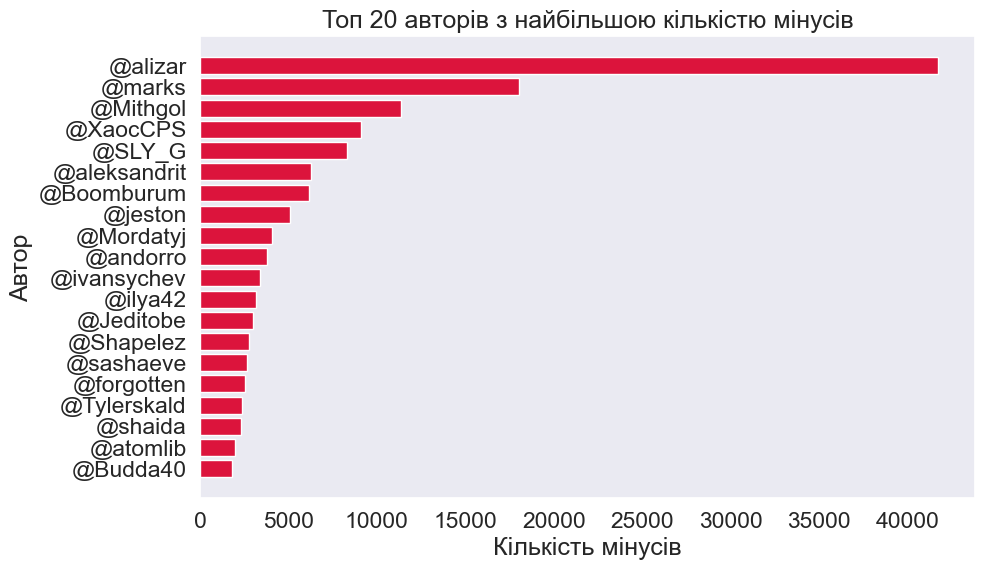

In [15]:
# Групування за авторами і підрахунок кількості мінусів для кожного автора
author_minus = df.groupby('author')['votes_minus'].sum().reset_index()

# Сортування за кількістю мінусів у порядку спадання
author_minus_sorted = author_minus.sort_values(by='votes_minus', ascending=False)

# Вибір 20 авторів з найбільшою кількістю мінусів
top_20_minus_authors = author_minus_sorted.head(20)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.barh(top_20_minus_authors['author'], top_20_minus_authors['votes_minus'], color='crimson')
plt.xlabel('Кількість мінусів')
plt.ylabel('Автор')
plt.title('Топ 20 авторів з найбільшою кількістю мінусів')
plt.gca().invert_yaxis()  # Інвертувати вісь Y, щоб автор з найбільшою кількістю мінусів був вгорі
plt.show()

Відповідь:
* @alizar найчастіше "мінусують"

## 5\. Порівняйте суботи і понеділки

Чи правда, що по суботам автори пишуть в основному вдень, а по понедількам — в основному вечером?

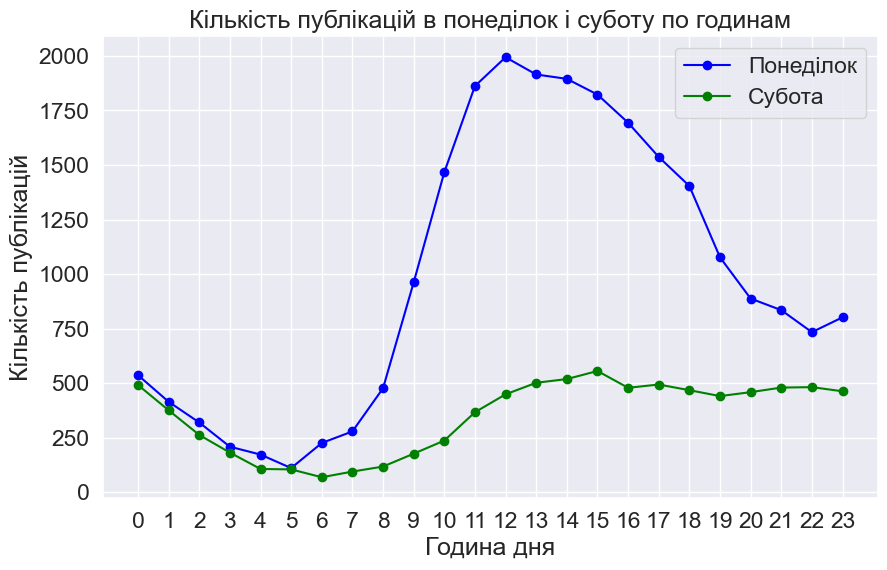

In [16]:
# Додавання колонок для дня тижня і години
df['dayofweek'] = df['published'].dt.weekday  # День тижня (0 = Понеділок, 5 = Субота)
df['hour'] = df['published'].dt.hour  # Година публікації

# Фільтрація для понеділків (0) та субот (5)
df_monday_saturday = df[df['dayofweek'].isin([0, 5])]

# Групування даних за днями тижня і годинами
grouped = df_monday_saturday.groupby(['dayofweek', 'hour']).size().unstack(fill_value=0)

# Побудова графіка
plt.figure(figsize=(10, 6))

# Графік для понеділка
plt.plot(grouped.loc[0], marker='o', label='Понеділок', color='blue')

# Графік для суботи
plt.plot(grouped.loc[5], marker='o', label='Субота', color='green')

# Оформлення графіка
plt.title('Кількість публікацій в понеділок і суботу по годинам')
plt.xlabel('Година дня')
plt.ylabel('Кількість публікацій')
plt.xticks(range(0, 24))  # Години від 0 до 23
plt.grid(True)
plt.legend()

# Показати графік
plt.show()

Чи правда, що по суботам автори пишуть в основному вдень, а по понедількам — в основному вечер?
Відповідь:
1. і в понеділок і вв суботу автори більше пишуть вддень
2. в суботу ввечорі кількість публікацій майже такаж сама як і вдень в суботу, в той час як
у понеділок між днем і вечором велика різниця